In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading of Data

In [ ]:
import seaborn as sns
data = sns.load_dataset('titanic')

# Display the First Few Rows of the Dataset

In [ ]:
# Display the first few rows of the dataset
print(data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [ ]:
print(data.shape)

(891, 15)


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


# Summary Statistics

In [ ]:
# Summary statistics
print(data.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


# Check the Missing Values

In [ ]:
# Check for missing values
print(data.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
data['embarked'].mode()

0    S
Name: embarked, dtype: object

In [ ]:
data.loc[data['embarked'] == 'PRT', 'embarked'].count()

0

In [ ]:
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

In [ ]:
print(data.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
data['embark_town'].mode()

0    Southampton
Name: embark_town, dtype: object

In [ ]:
data.loc[data['embark_town'] == 'PRT', 'embark_town'].count()

0

In [ ]:
data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)

In [ ]:
print(data.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


In [ ]:
data['age'].mode()

0    24.0
Name: age, dtype: float64

In [ ]:
data.loc[data['age'] == 'PRT', 'age'].count()

0

In [ ]:
data['age'].fillna(data['age'].mode()[0], inplace=True)

In [ ]:
print(data.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


In [ ]:
data['deck'].mode()

0    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
data.loc[data['deck'] == 'PRT', 'deck'].count()

0

In [ ]:
data['deck'].fillna(data['deck'].mode()[0], inplace=True)

In [ ]:
print(data.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


#Exploratory Data Analysis

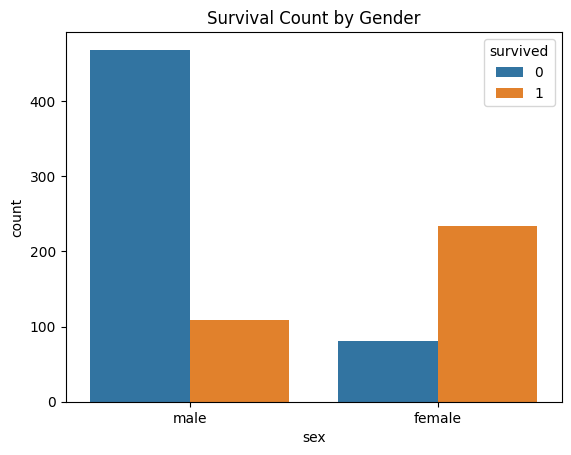

In [ ]:
#Survival Rate by Gender
sns.countplot(x='sex', hue='survived', data=data)
plt.title('Survival Count by Gender')
plt.show()

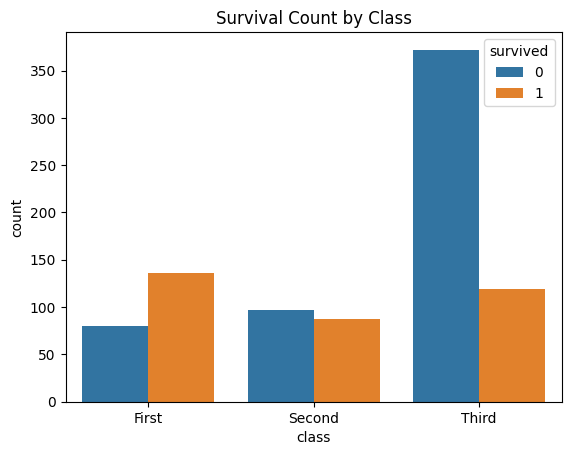

In [ ]:
#Survival Rate by Class
sns.countplot(x='class', hue='survived', data=data)
plt.title('Survival Count by Class')
plt.show()

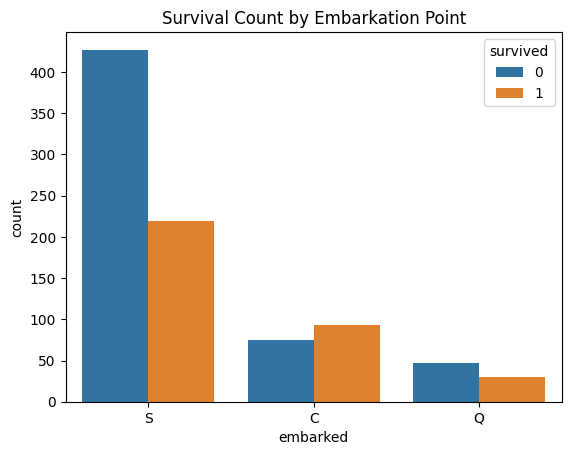

In [ ]:
# Survival Rate by Embarkation Point
sns.countplot(x='embarked', hue='survived', data=data)
plt.title('Survival Count by Embarkation Point')
plt.show()

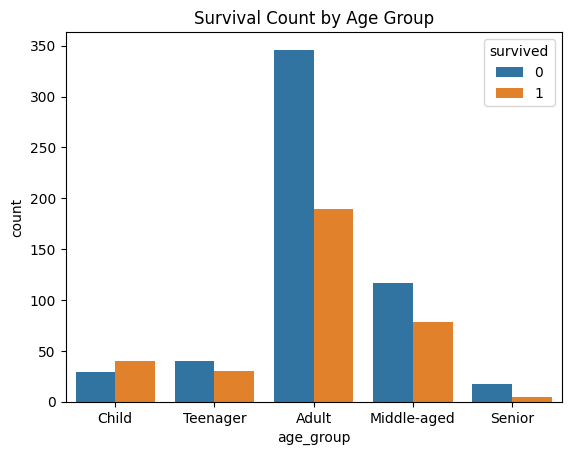

In [ ]:
# Survival Rate by Age Group
data['age_group'] = pd.cut(data['age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior'])
sns.countplot(x='age_group', hue='survived', data=data)
plt.title('Survival Count by Age Group')
plt.show()


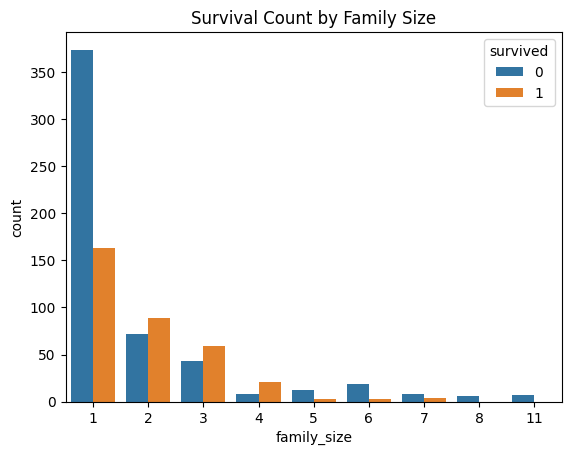

In [ ]:
# Survival Rate by Family Size
data['family_size'] = data['sibsp'] + data['parch'] + 1
sns.countplot(x='family_size', hue='survived', data=data)
plt.title('Survival Count by Family Size')
plt.show()

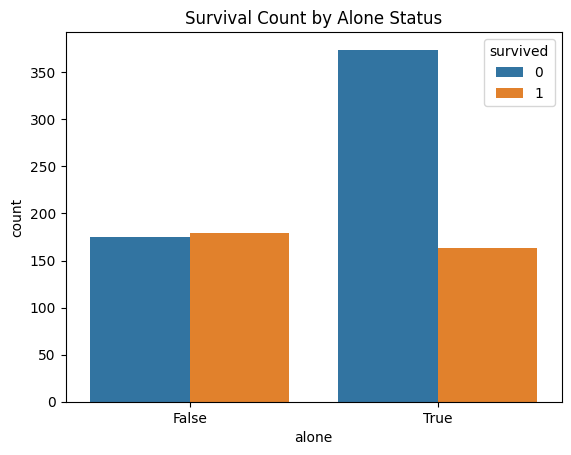

In [ ]:
# Survival Rate by Alone Status
sns.countplot(x='alone', hue='survived', data=data)
plt.title('Survival Count by Alone Status')
plt.show()

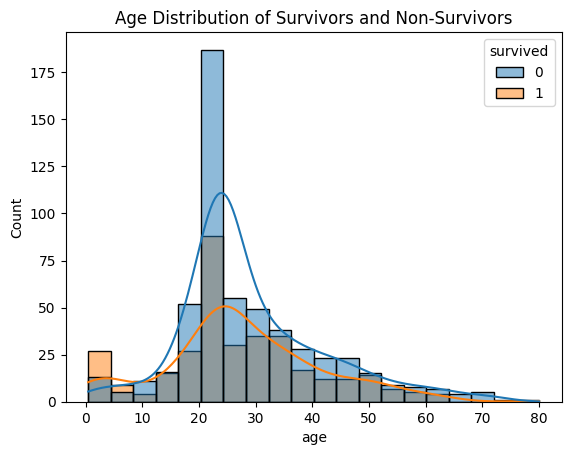

In [ ]:
# Age Distribution of Survivors and Non_survivors
sns.histplot(data=data, x='age', hue='survived', bins=20, kde=True)
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.show()

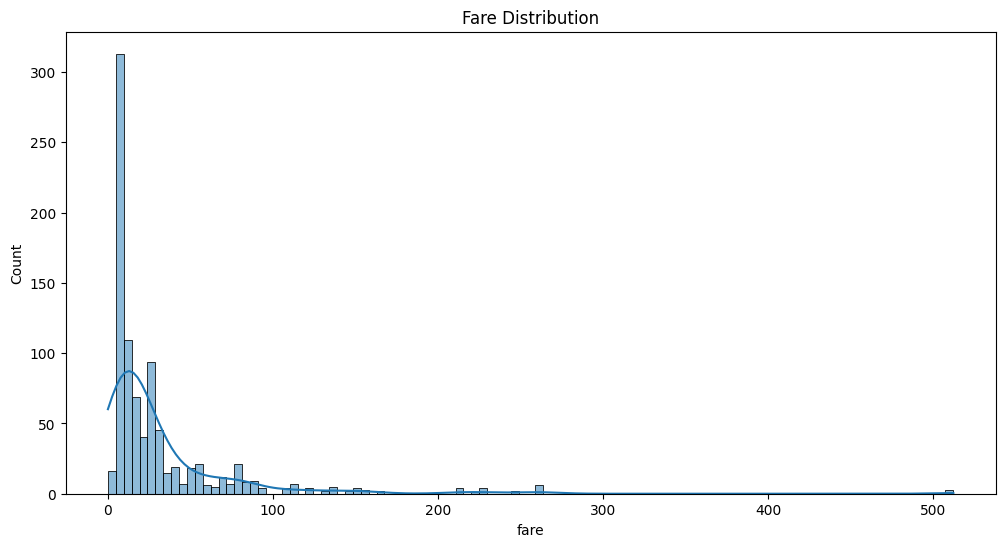

In [ ]:
# Fair Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data, x='fare', kde=True)
plt.title('Fare Distribution')
plt.show()

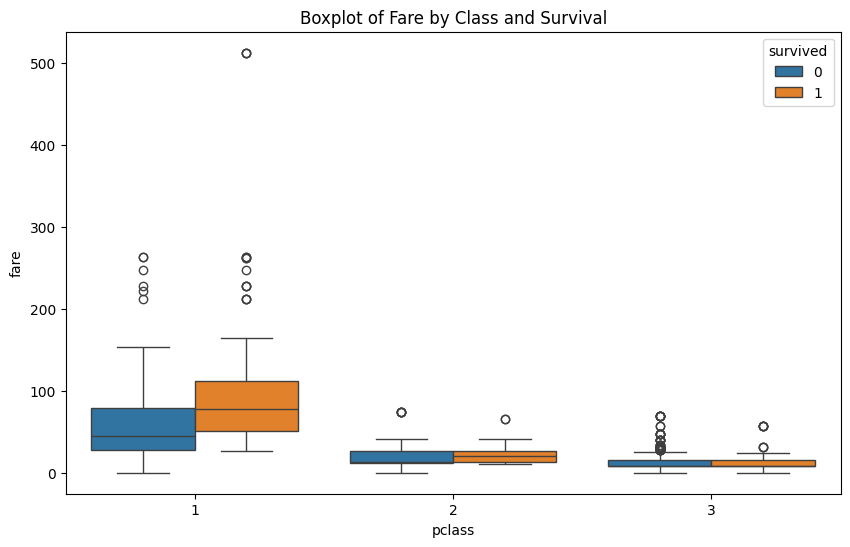

In [ ]:
# Boxplot of Fare by Survival and Class:
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', hue='survived', data=data)
plt.title('Boxplot of Fare by Class and Survival')
plt.show()

<ipython-input-37-47b3e061a7d8>:2: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(x='age_group', hue='pclass', data=data, palette=sns.color_palette('Set2'))


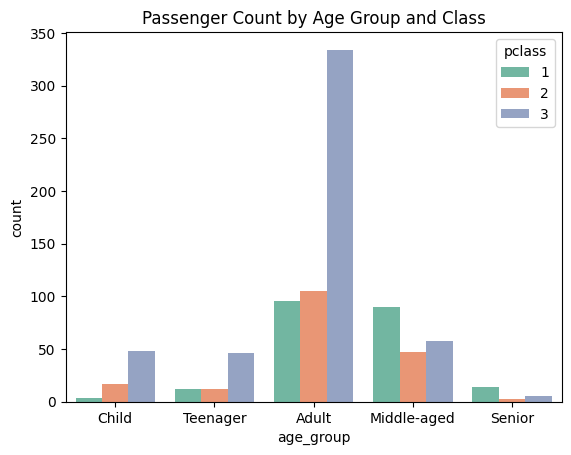

In [ ]:
# Passenger Count by Age Group and Class
sns.countplot(x='age_group', hue='pclass', data=data, palette=sns.color_palette('Set2'))
plt.title('Passenger Count by Age Group and Class')
plt.show()

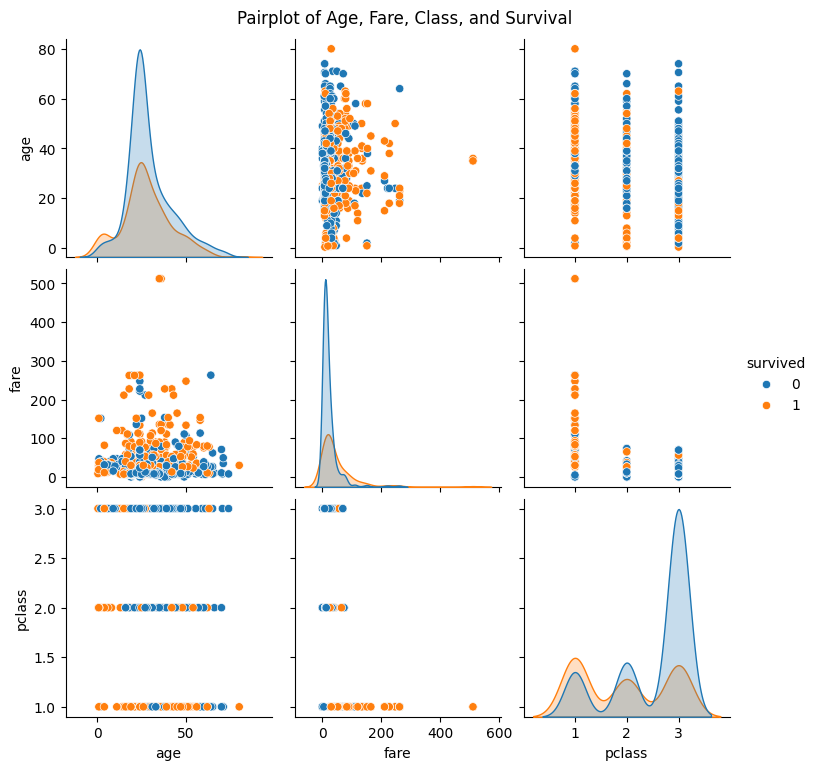

In [ ]:
# Pairplot of Key Features:
sns.pairplot(data[['age', 'fare', 'pclass', 'survived']], hue='survived', diag_kind='kde')
plt.suptitle('Pairplot of Age, Fare, Class, and Survival', y=1.02)
plt.show()

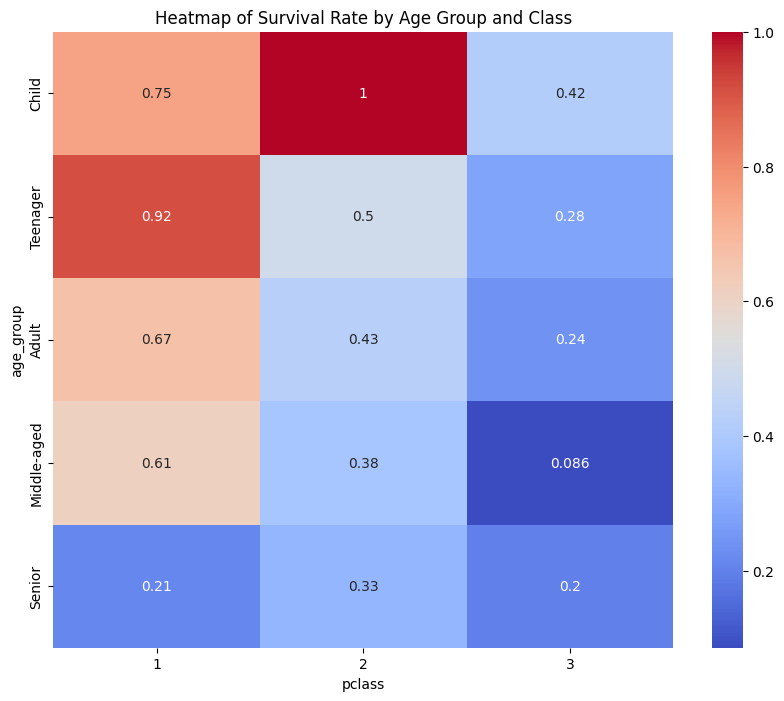

In [ ]:
# Heatmap of Survival Rate by Age and Fare
plt.figure(figsize=(10, 8))
sns.heatmap(data.pivot_table(index='age_group', columns='pclass', values='survived'), annot=True, cmap='coolwarm')
plt.title('Heatmap of Survival Rate by Age Group and Class')
plt.show()